In [1]:
#indepdent sdes implimentation 
import numpy as np
from model_2point import *




phiA= 0.5
phiB = 1-phiA
chi = 1.0
rho0 = 1.0
nx = 2
zA = 1e3
zB = 1e3
tmax = 10
dt = 0.01
zetalist = [0.0,0.1,0.5,1,2,5,10,100]

# Generate arrays of complex numbers
wplus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
wplus = wplus-np.mean(wplus)
wminus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
w0 = np.vstack((wplus,wminus)).T
lambda_plus = 1.0
lambda_minus = 1.0
_model = model(chi,rho0,ensemble='grand')
_model.init_grandcanonical(zA,zB)
#model.dHw(w)

model_list = [_model.dHdw_compressible,_model.dHdw_weakcompressible,_model.dHdw_incompressible]
lambdat = np.array([lambda_plus,lambda_minus])
wlist = []
corrlist = []
sde = sde_int(w0,_model.dHdw_compressible,_model.wick)
sde.initialize_project(_model.g,_model.dgdw)
w,t, = sde.Euler_Maruyama_Projected(tmax,dt,lambdat,SCFT = False)
corrlist.append(_model.getCorrelation_list(w))

sde = sde_int(w0,_model.dHdw_incompressible,_model.wick)
w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
corrlist.append(_model.getCorrelation_list(w))

(1, 2)
[[-0.80357224+0.01976129j -0.80357224+0.01976129j]]


TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'g'.Shape should be (2,) but it is (1, 2).

ValueError: x and y must have same first dimension, but have shapes (952,) and (0,)

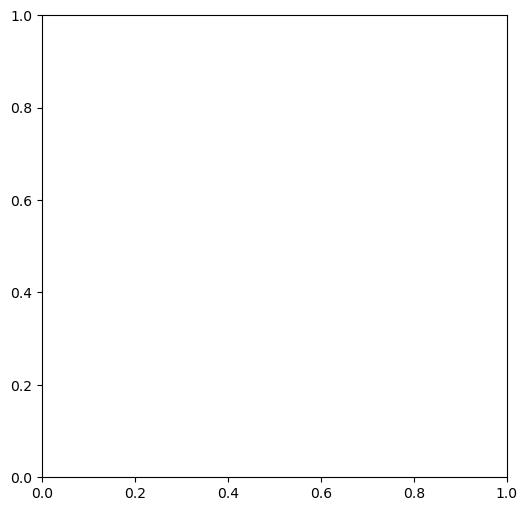

In [ ]:
#process data get density profiles over time
# plot <density^2>-<density>^2
offset = 50
label = ['compressible','incompressible']
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))

for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:])/rho0,label = label[i])
    break
plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
plt.ylim(-10.0,5.0)

